<a href="https://colab.research.google.com/github/codeByGaurish/ml-usecase/blob/main/ml_usecase_telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split
# import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost import XGBClassifier

# import 'GridSearchCV'
from sklearn.model_selection import GridSearchCV

# import 'accuracy_score' r2_score
from sklearn.metrics import accuracy_score,r2_score, classification_report, confusion_matrix

# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

ModuleNotFoundError: No module named 'category_encoders'

In [3]:
pd.__version__

'2.1.4'

# **Data Exploration : Understand the dataset structure, including number of rows, columns, and data types.**

In [5]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.shape

(7043, 21)


   Observation

*   Number of rows - 7043
*   Number of column - 21



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation :           
*   apartm SeniorCitizen,tenure are integer other are objects
*   monthly changes  is float
*   other columns are string  
             

Putting summary of each column to understand the data better



*   customerID - can be used to identify a customer as total distinct value is equal to number of rows
*   gender	   - gender of the customer
*   SeniorCitizen - a customer is senior citizen or not
*   Partner - binary data value as yes or non-null defines if customer has partner or not
*  Dependents - binary data value as yes or non-null tells us if customer has dependents or not
* tenure -  has continuos integer values not sure if thats year
* PhoneService - binary data value as yes or non-null tells us if customer has PhoneService or not
* MultipleLines - categorical feature with 3 category
* InternetService - categorical feature with 3 category
* OnlineSecurity - categorical feature with 3 category
* OnlineBackup - categorical feature with 3 category
* DeviceProtection - categorical feature with 3 category
* TechSupport - categorical feature with 3 category
* StreamingTV - categorical feature with 3 category
* StreamingMovies - categorical feature with 3 category
* Contract - categorical feature with 3 category
* PaperlessBilling - tells us if paperless billing is opted or not
* PaymentMethod - payment method
* MonthlyCharges - monthly charges
* TotalCharges - as per service total charges
* Churn - target variable as yes/no



In [44]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Missing Value analaysis and handling **

In [46]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Observation : no null values found



target variable is Churn and most of the customer has values as No

<Axes: xlabel='Churn'>

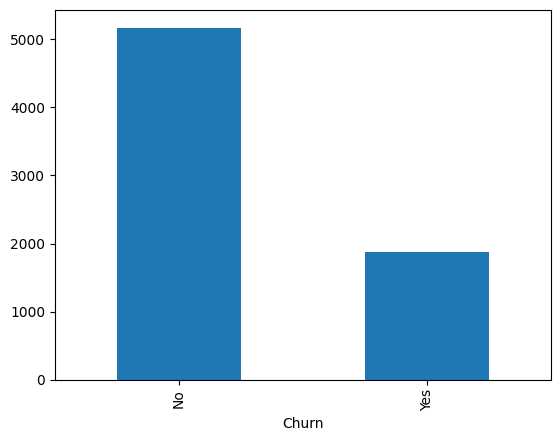

In [48]:
df["Churn"].value_counts().plot.bar()

# Single Feature Analysis / Univrient Analysis

Text(0.5, 0, 'Sex')

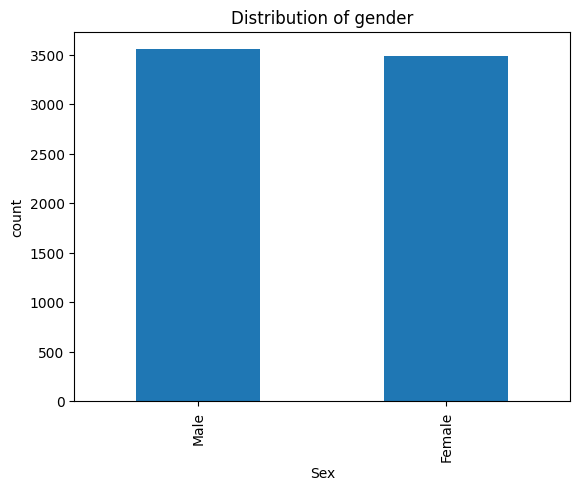

In [57]:
df["gender"].value_counts().plot.bar()
plt.title('Distribution of gender')
plt.ylabel('count')
plt.xlabel('gender')


Observation : gender distribution are almost same

Text(0.5, 0, 'SeniorCitizen')

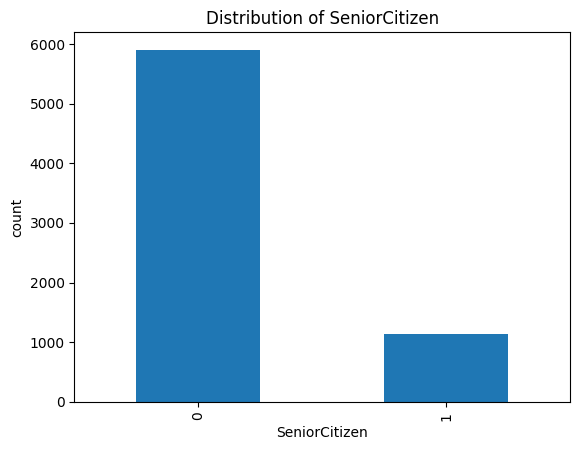

In [60]:
df["SeniorCitizen"].value_counts().plot.bar()
plt.title('Distribution of SeniorCitizen')
plt.ylabel('count')
plt.xlabel('SeniorCitizen')

Observation : most of the customers are senior citizen

Text(0.5, 0, 'Partner')

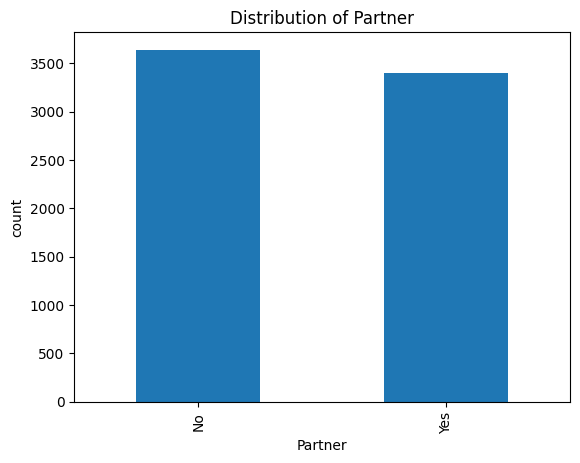

In [61]:
df["Partner"].value_counts().plot.bar()
plt.title('Distribution of Partner')
plt.ylabel('count')
plt.xlabel('Partner')

observation : out of 7306 customer almost 55% are not having partner

Text(0.5, 0, 'Dependents')

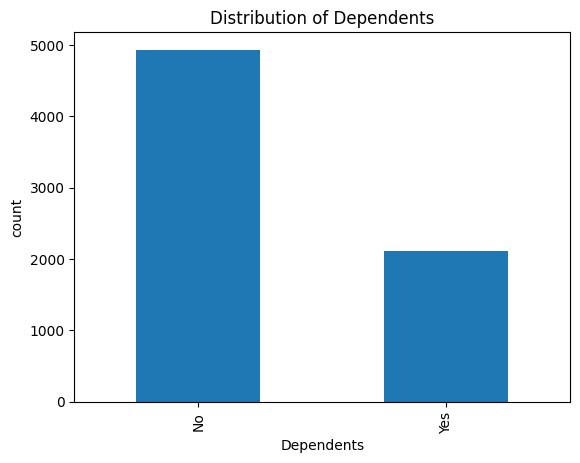

In [63]:
df["Dependents"].value_counts().plot.bar()
plt.title('Distribution of Dependents')
plt.ylabel('count')
plt.xlabel('Dependents')

Observation : out of 7043 cutomer , 4900 are not having any dependents and only around 2100 are having dependents

Text(0.5, 0, 'Age')

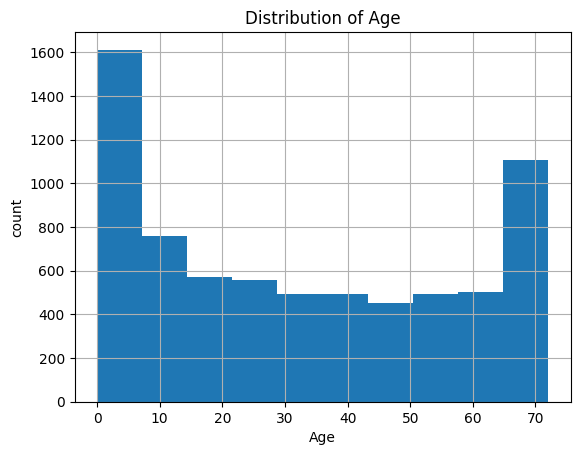

In [6]:
df['tenure'].hist()
plt.title('Distribution of Age')
plt.ylabel('count')
plt.xlabel('Age')

Text(0.5, 0, 'PhoneService')

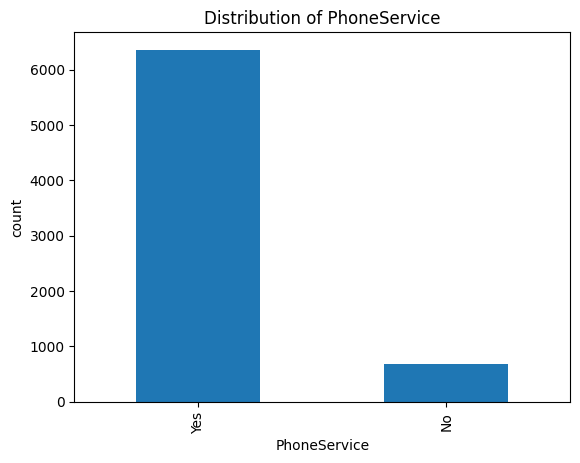

In [8]:
df["PhoneService"].value_counts().plot.bar()
plt.title('Distribution of PhoneService')
plt.ylabel('count')
plt.xlabel('PhoneService')

Observation

Most of the customers have phoneService subscribed

Text(0.5, 0, 'MultipleLines')

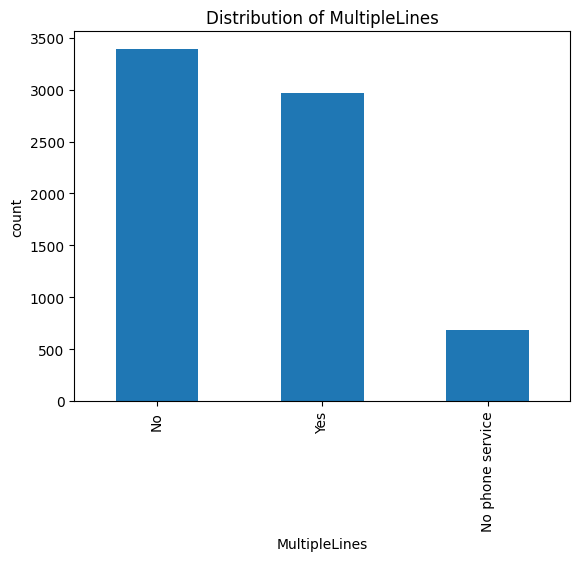

In [9]:
df["MultipleLines"].value_counts().plot.bar()
plt.title('Distribution of MultipleLines')
plt.ylabel('count')
plt.xlabel('MultipleLines')

Text(0.5, 0, 'InternetService')

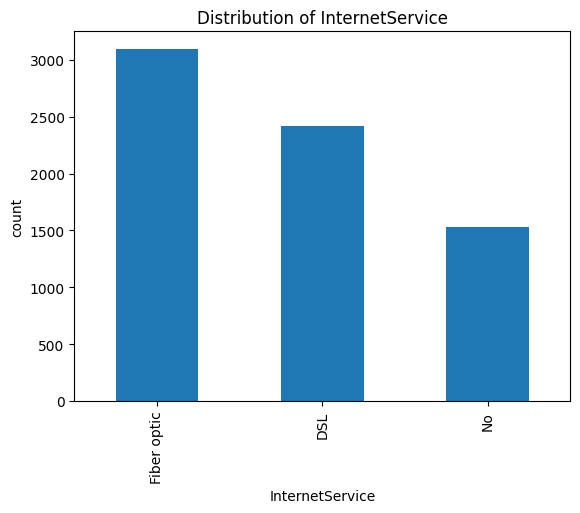

In [10]:
df["InternetService"].value_counts().plot.bar()
plt.title('Distribution of InternetService')
plt.ylabel('count')
plt.xlabel('InternetService')

Observation :

apart from 1400 employee most of the custer have internet service like DSL or fiber optics

Text(0.5, 0, 'OnlineSecurity')

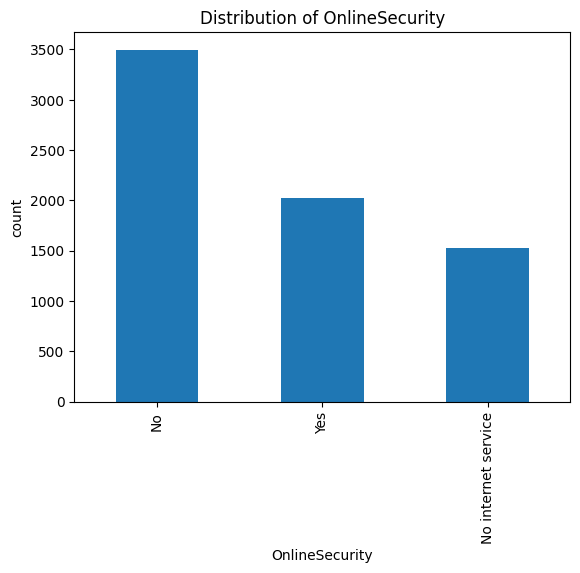

In [11]:
df["OnlineSecurity"].value_counts().plot.bar()
plt.title('Distribution of OnlineSecurity')
plt.ylabel('count')
plt.xlabel('OnlineSecurity')

Text(0.5, 0, 'OnlineBackup')

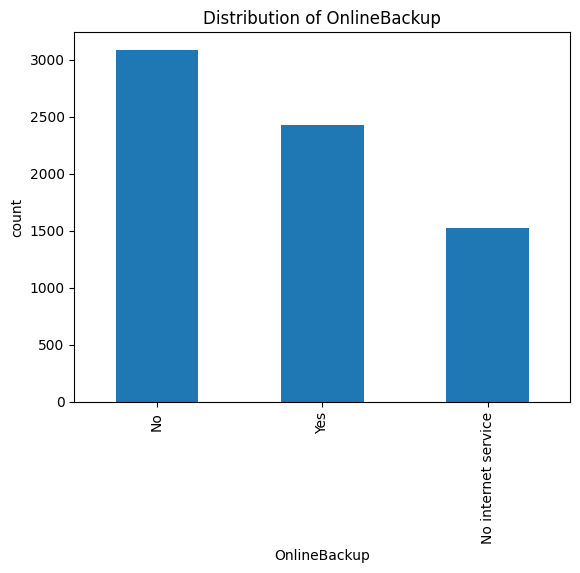

In [12]:
df["OnlineBackup"].value_counts().plot.bar()
plt.title('Distribution of OnlineBackup')
plt.ylabel('count')
plt.xlabel('OnlineBackup')

Text(0.5, 0, 'DeviceProtection')

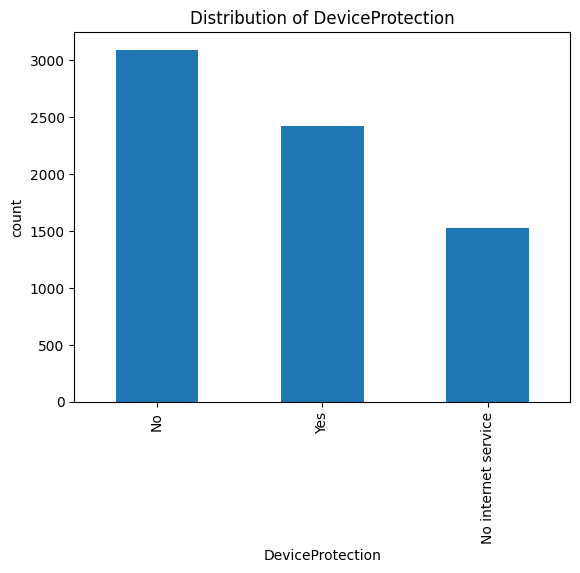

In [13]:
df["DeviceProtection"].value_counts().plot.bar()
plt.title('Distribution of DeviceProtection')
plt.ylabel('count')
plt.xlabel('DeviceProtection')

Text(0.5, 0, 'TechSupport')

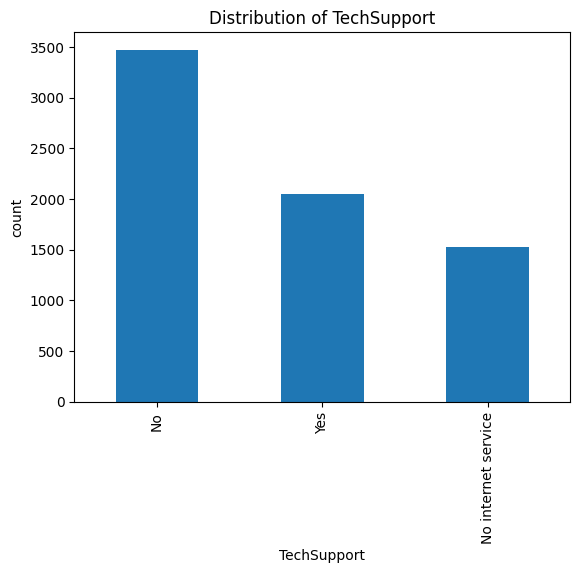

In [14]:
df["TechSupport"].value_counts().plot.bar()
plt.title('Distribution of TechSupport')
plt.ylabel('count')
plt.xlabel('TechSupport')

Text(0.5, 0, 'StreamingTV')

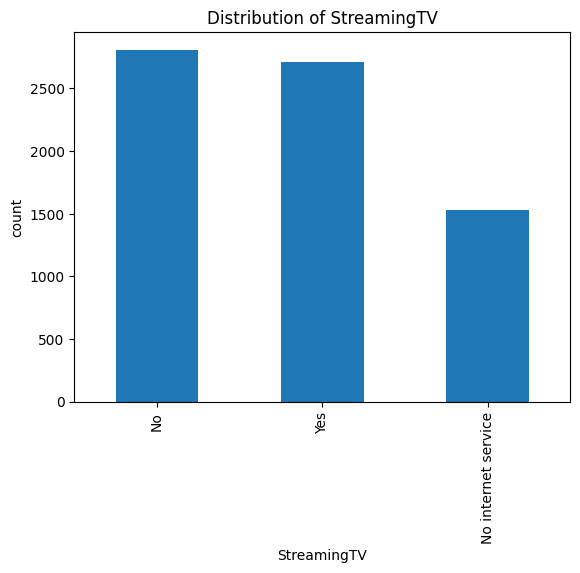

In [15]:
df["StreamingTV"].value_counts().plot.bar()
plt.title('Distribution of StreamingTV')
plt.ylabel('count')
plt.xlabel('StreamingTV')

Text(0.5, 0, 'StreamingMovies')

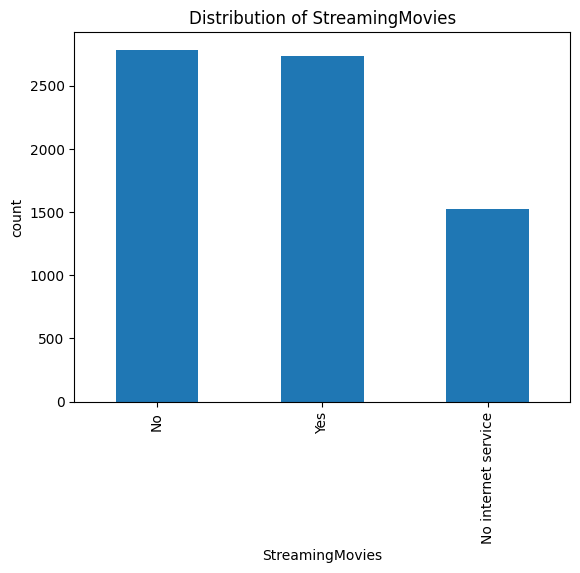

In [16]:
df["StreamingMovies"].value_counts().plot.bar()
plt.title('Distribution of StreamingMovies')
plt.ylabel('count')
plt.xlabel('StreamingMovies')

Text(0.5, 0, 'Contract')

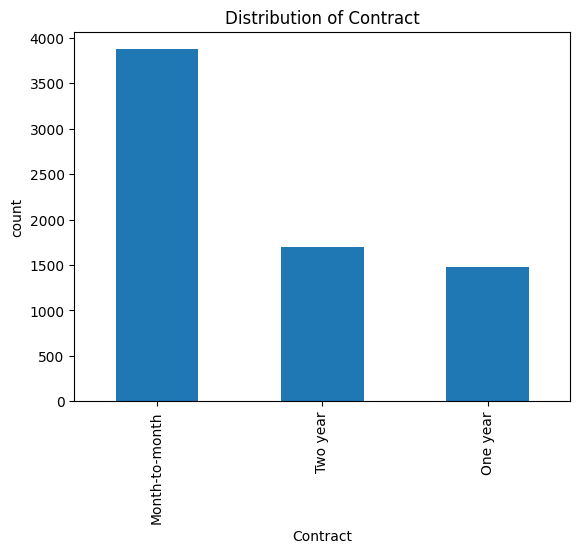

In [17]:
df["Contract"].value_counts().plot.bar()
plt.title('Distribution of Contract')
plt.ylabel('count')
plt.xlabel('Contract')

Observation :  most of the customer contact is on month-to-month

Text(0.5, 0, 'PaperlessBilling')

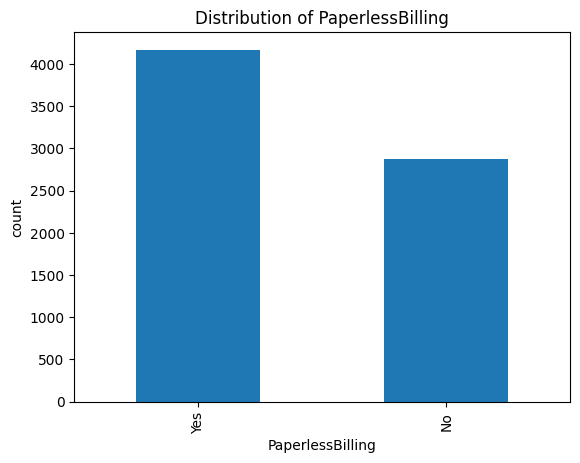

In [18]:
df["PaperlessBilling"].value_counts().plot.bar()
plt.title('Distribution of PaperlessBilling')
plt.ylabel('count')
plt.xlabel('PaperlessBilling')

Text(0.5, 0, 'Age')

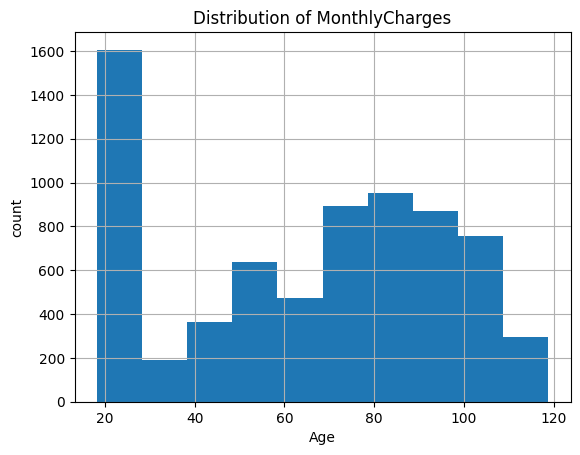

In [19]:
df['MonthlyCharges'].hist()
plt.title('Distribution of MonthlyCharges')
plt.ylabel('count')
plt.xlabel('MonthlyCharges')

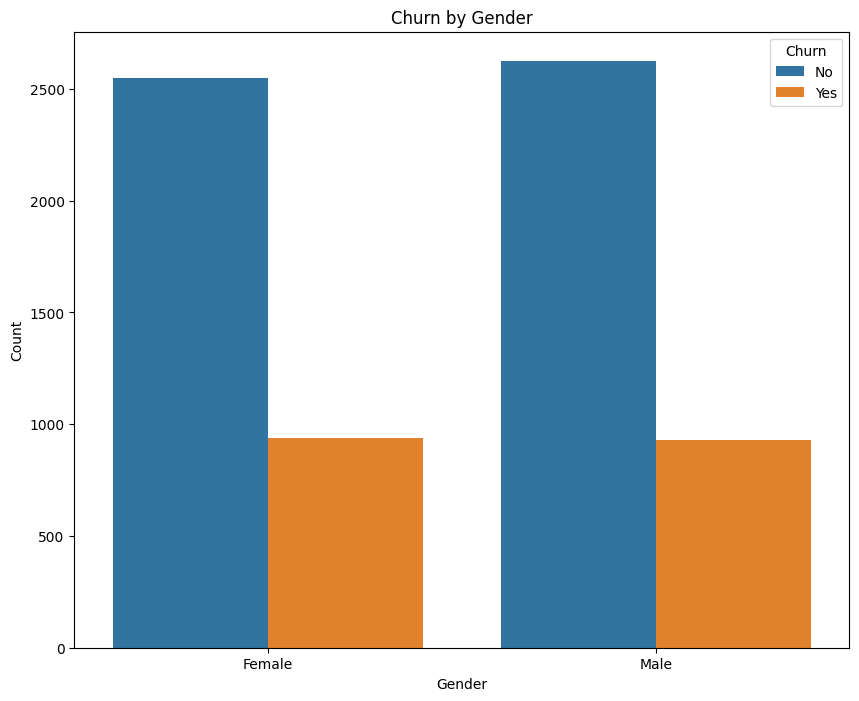

In [24]:
plt.figure(figsize=(10, 8))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

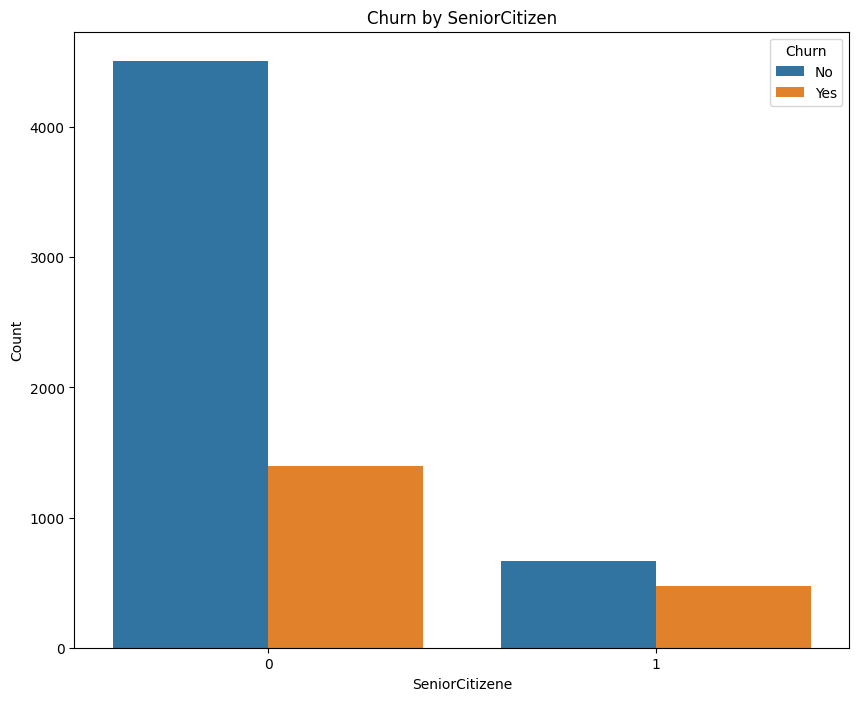

In [26]:
plt.figure(figsize=(10, 8))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn by SeniorCitizen')
plt.xlabel('SeniorCitizene')
plt.ylabel('Count')
plt.show()

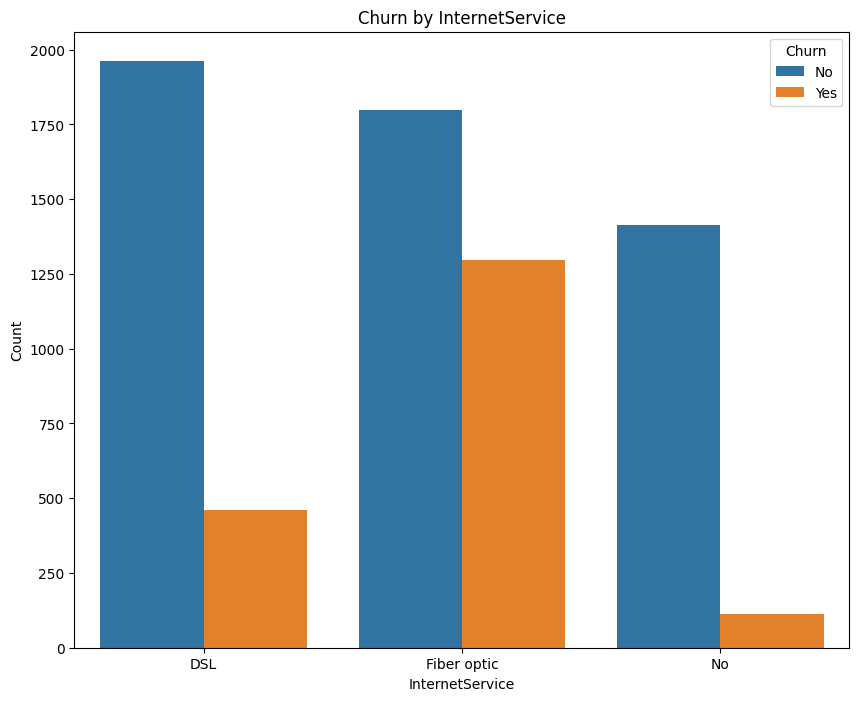

In [27]:
plt.figure(figsize=(10, 8))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by InternetService')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.show()

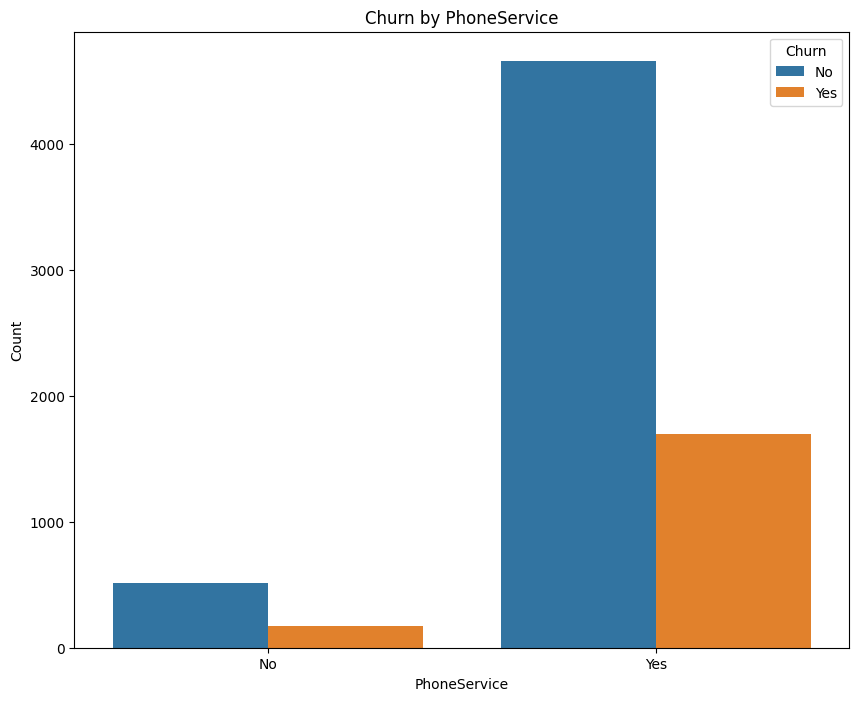

In [28]:
plt.figure(figsize=(10, 8))
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.title('Churn by PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.show()

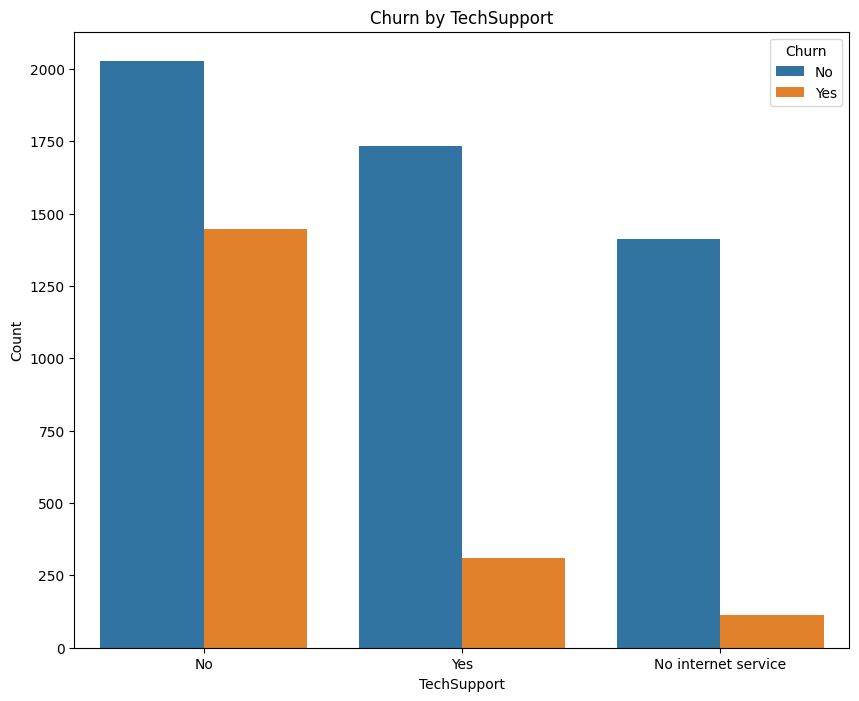

In [29]:
plt.figure(figsize=(10, 8))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn by TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.show()

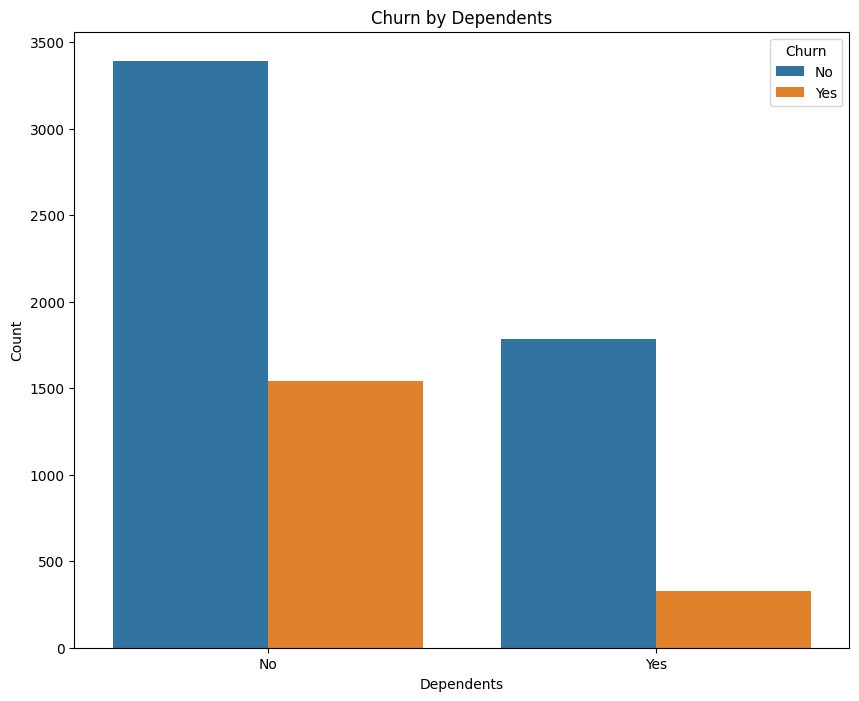

In [30]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Churn by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

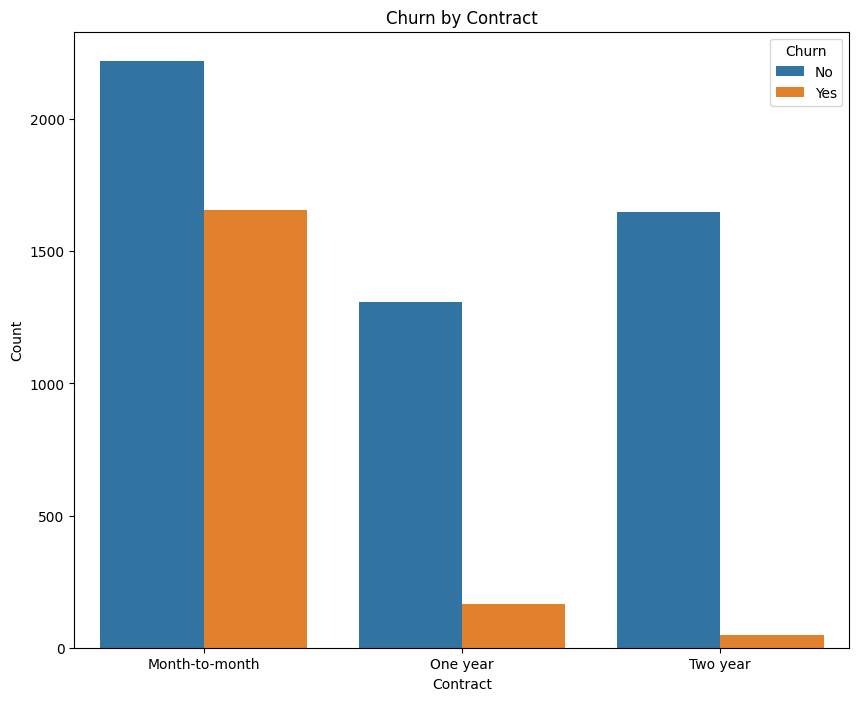

In [31]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

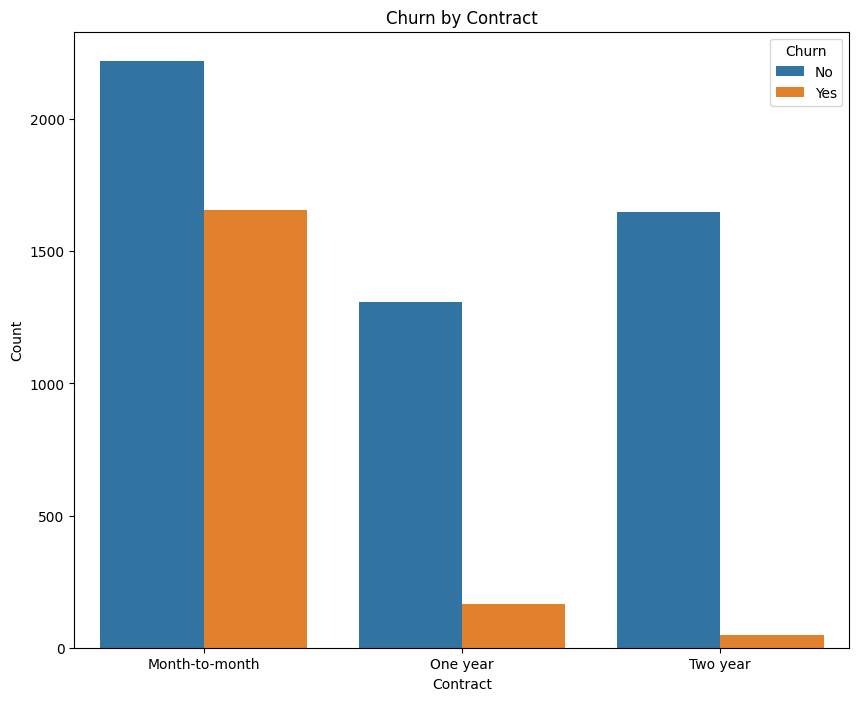

In [32]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

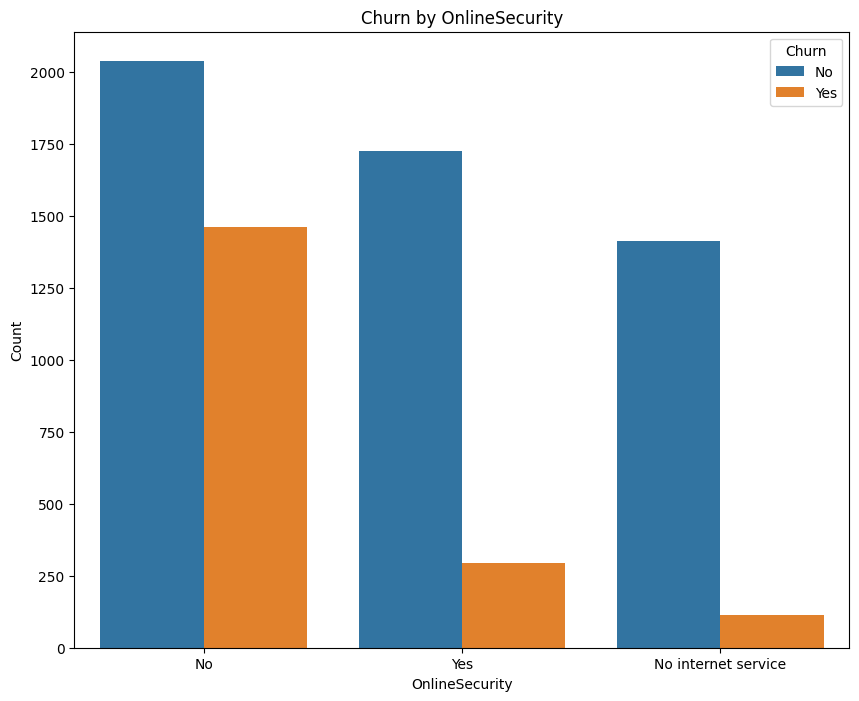

In [34]:
plt.figure(figsize=(10, 8))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Churn by OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.show()

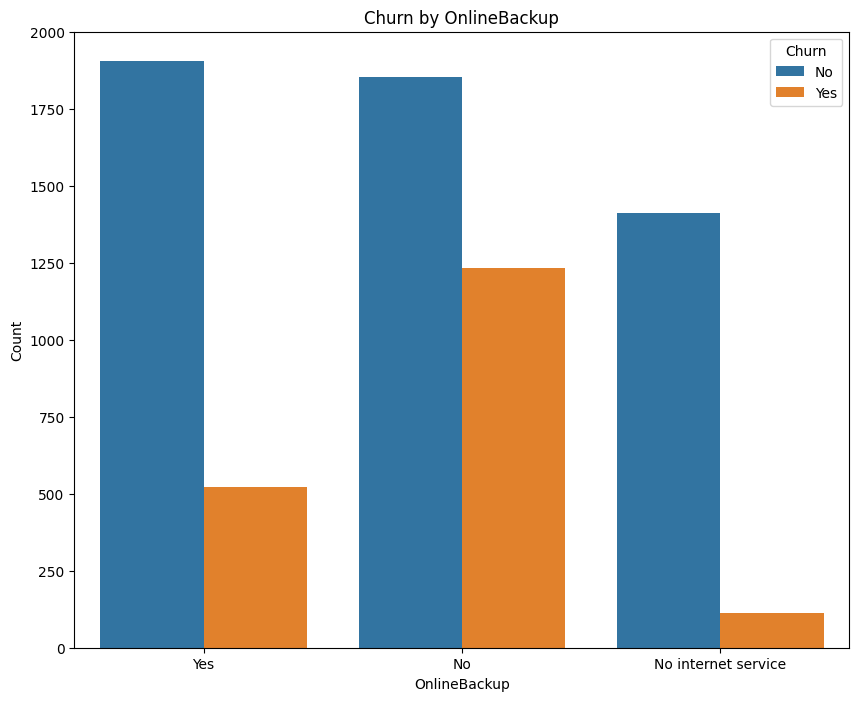

In [35]:
plt.figure(figsize=(10, 8))
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.title('Churn by OnlineBackup')
plt.xlabel('OnlineBackup')
plt.ylabel('Count')
plt.show()

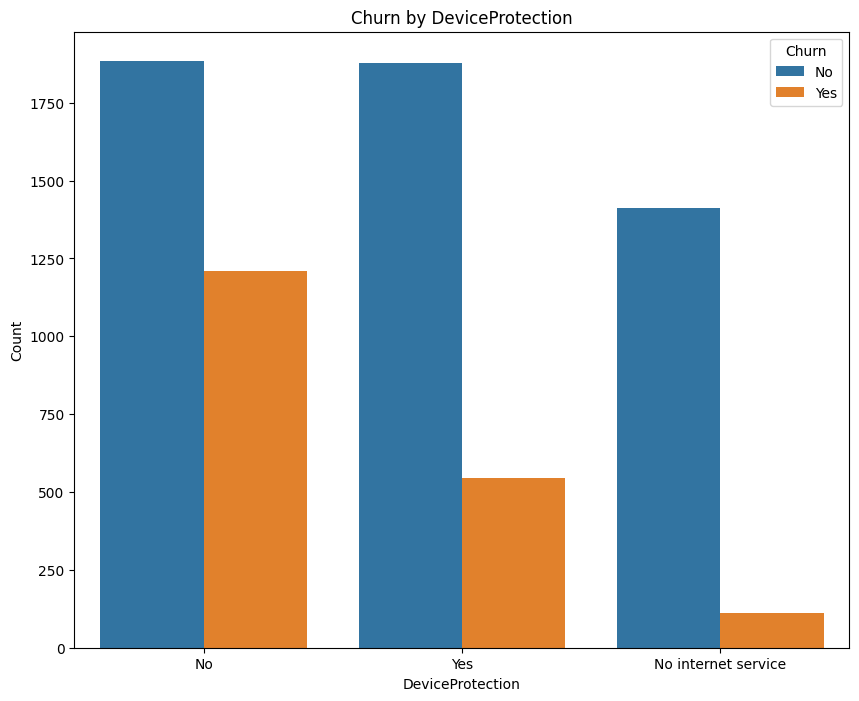

In [36]:
plt.figure(figsize=(10, 8))
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.title('Churn by DeviceProtection')
plt.xlabel('DeviceProtection')
plt.ylabel('Count')
plt.show()

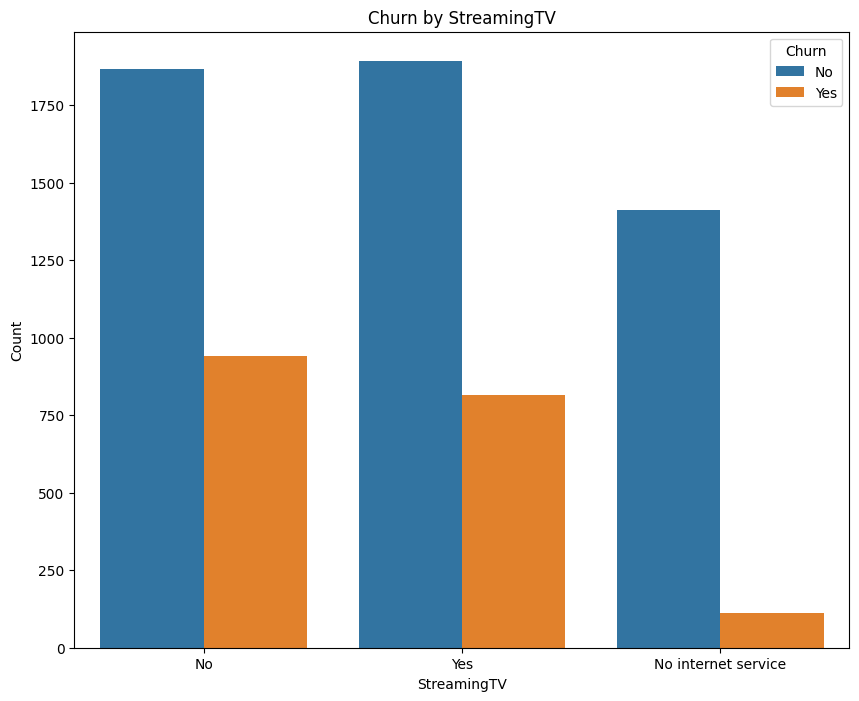

In [37]:
plt.figure(figsize=(10, 8))
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.title('Churn by StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Count')
plt.show()

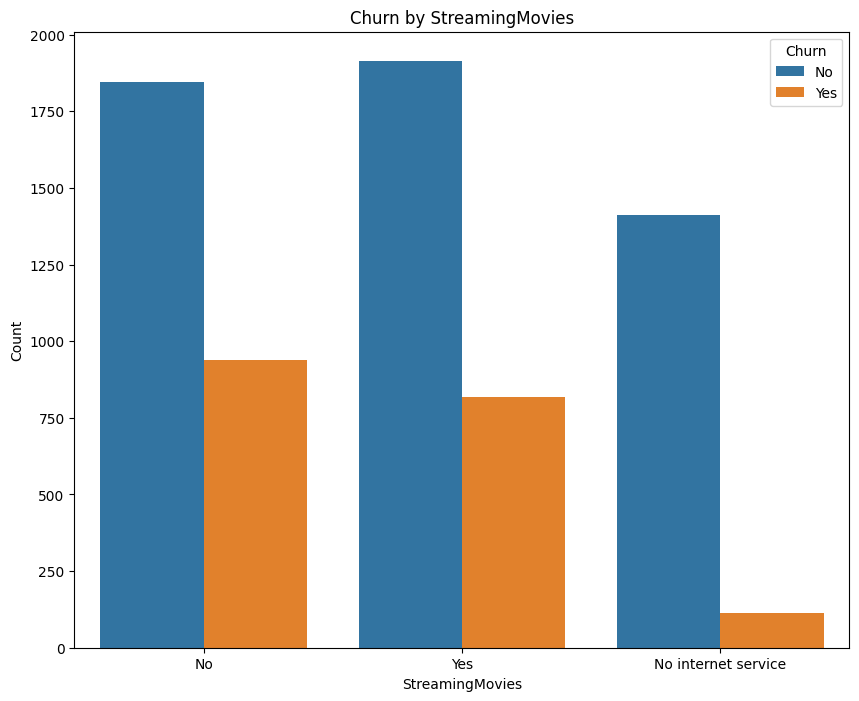

In [38]:
plt.figure(figsize=(10, 8))
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.title('Churn by StreamingMovies')
plt.xlabel('StreamingMovies')
plt.ylabel('Count')
plt.show()

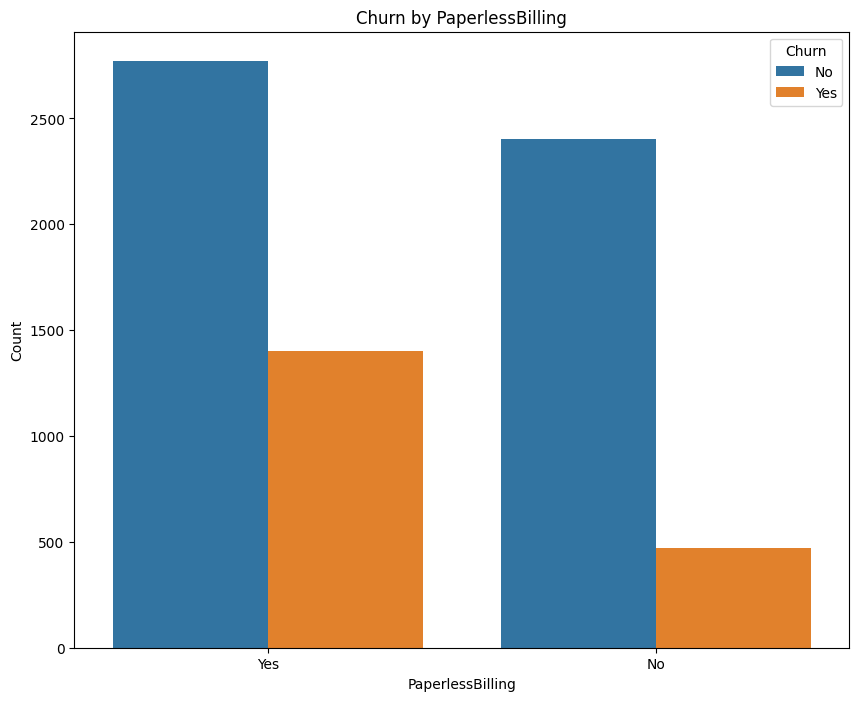

In [39]:
plt.figure(figsize=(10, 8))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title('Churn by PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.show()

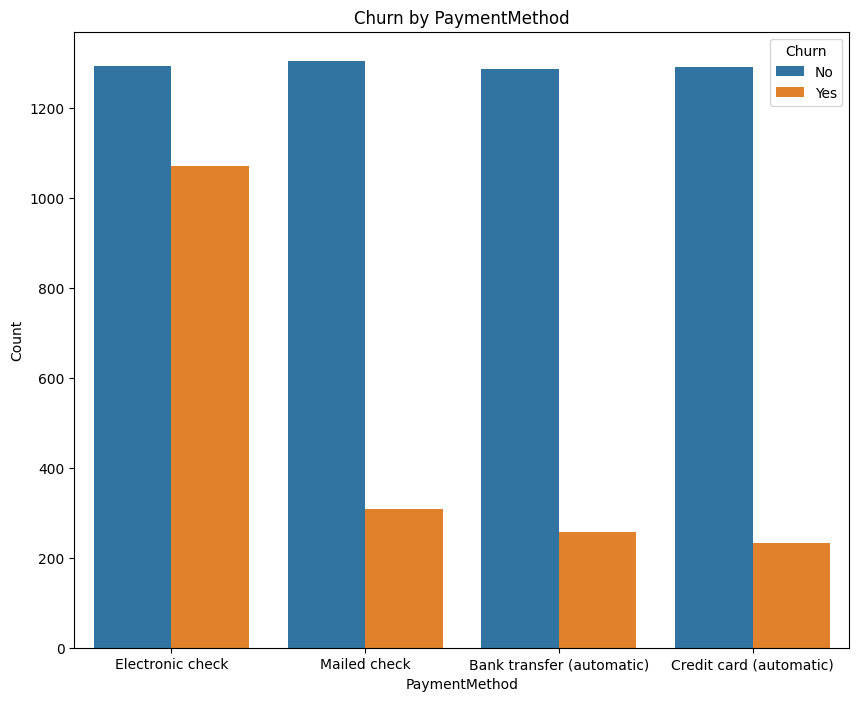

In [40]:
plt.figure(figsize=(10, 8))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.show()

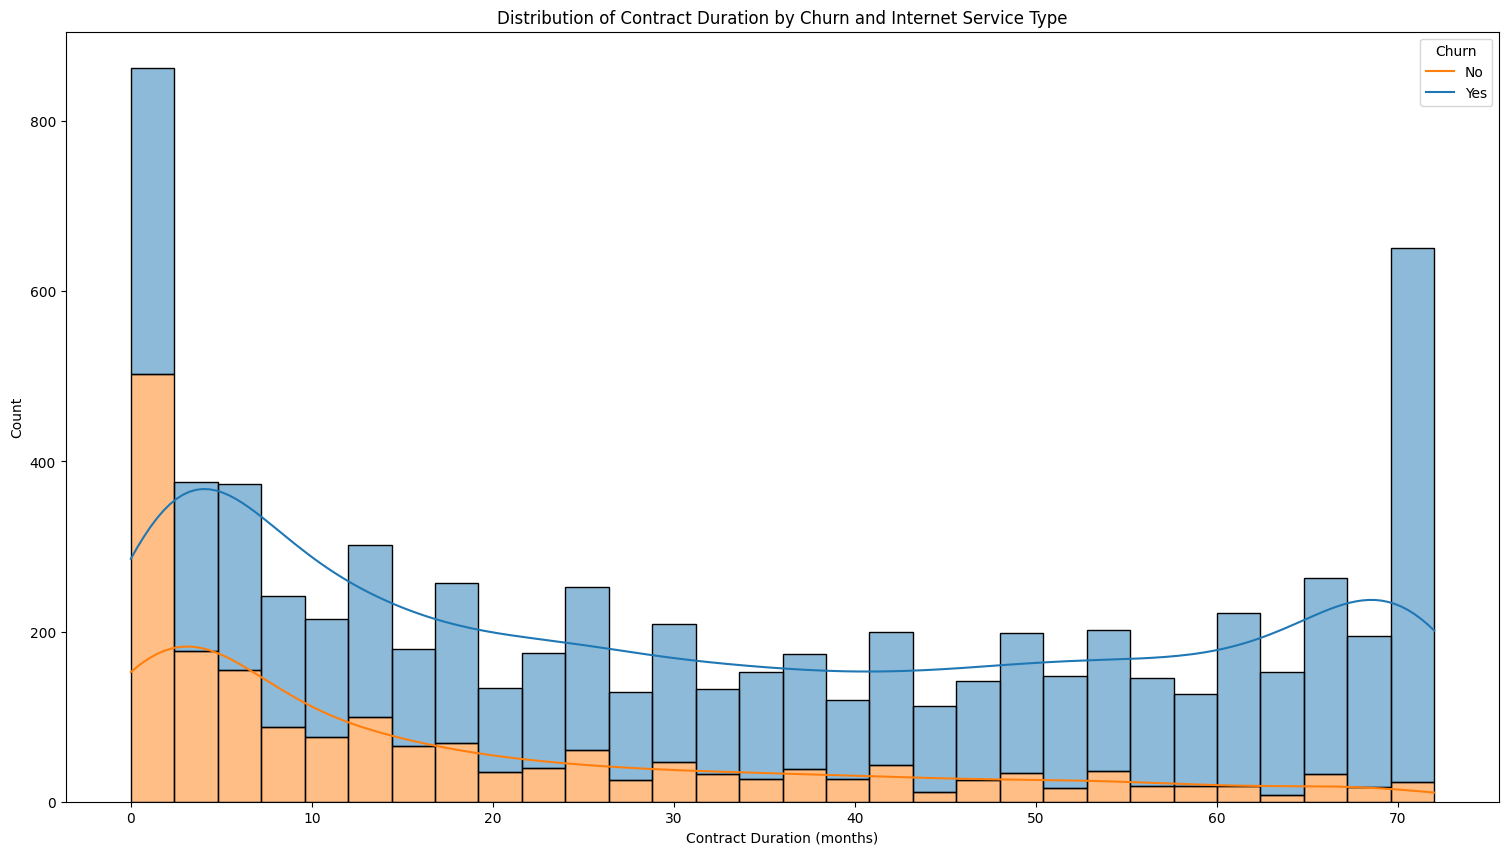

In [43]:
plt.figure(figsize=(18.5, 10))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple='stack', bins=30)
plt.title('Distribution of Contract Duration by Churn and Internet Service Type')
plt.xlabel('Contract Duration (months)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.grid(False)
plt.show()

Text(0, 0.5, 'Count')

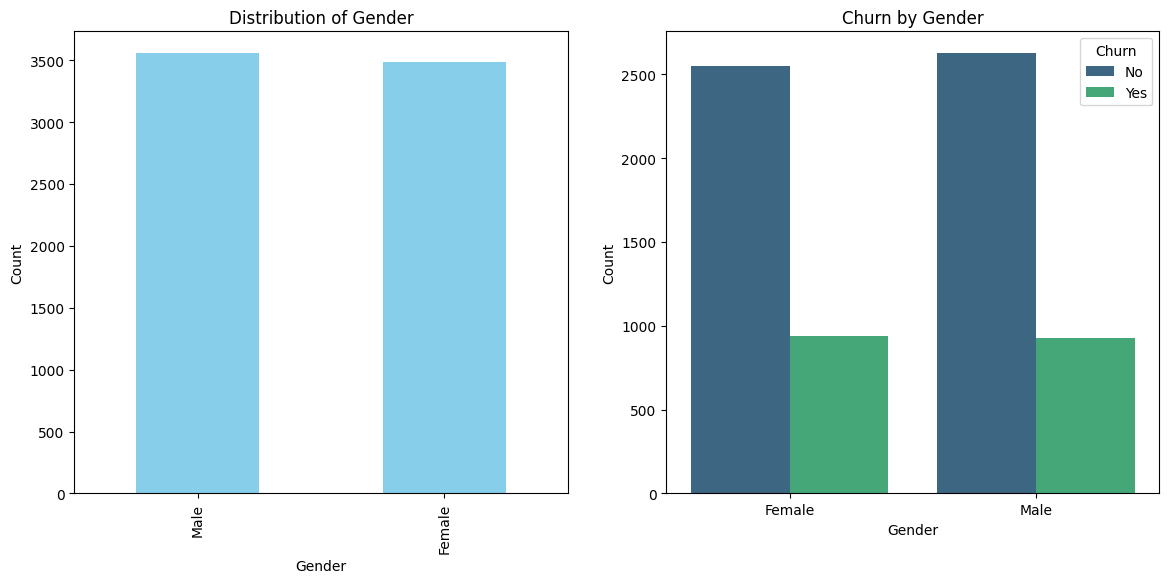

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['gender'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

Observation -

Gender distribution are not having much deviation in the data, Also with target variable both cant see major trends.

Text(0, 0.5, 'Count')

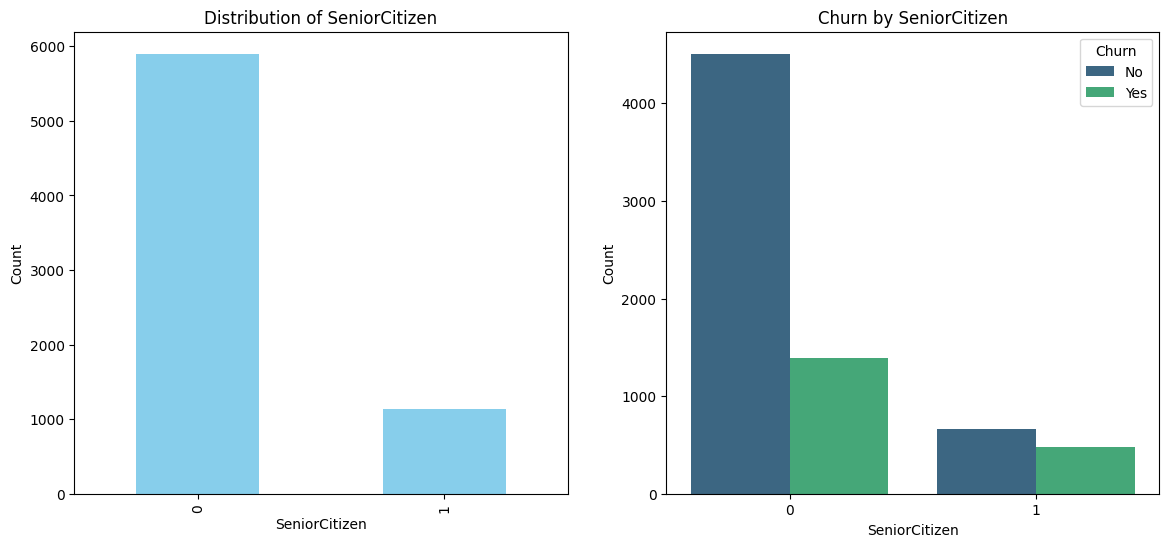

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['SeniorCitizen'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of SeniorCitizen')
axes[0].set_xlabel('SeniorCitizen')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by SeniorCitizen')
axes[1].set_xlabel('SeniorCitizen')
axes[1].set_ylabel('Count')

Observation -

SeniorCitizen: If the customer is a senior citizen (1) or not (0).

More customer are not senior citizen also if we see the relationship with the churn we can notice that customer who are not senior citizen are not cancelling there services.

Text(0, 0.5, 'Count')

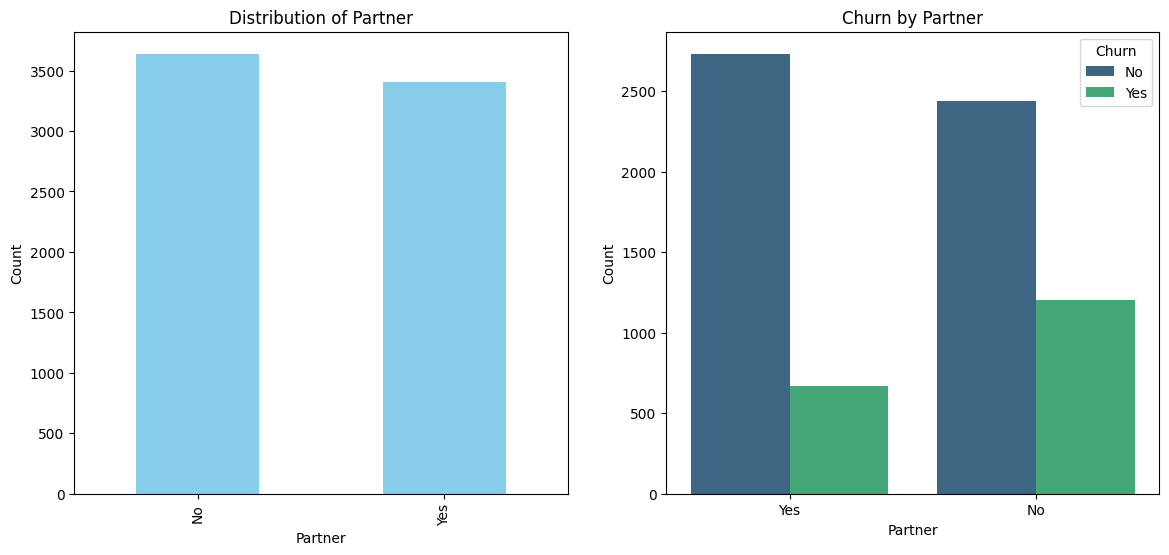

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['Partner'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Partner')
axes[0].set_xlabel('Partner')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by Partner')
axes[1].set_xlabel('Partner')
axes[1].set_ylabel('Count')

Observation -

Dont see major trends in feature distribution both with partner or without partner are not much deviating.

can see a trend customer with no partner are more likely to cancel the services then customer with partner.



Text(0, 0.5, 'Count')

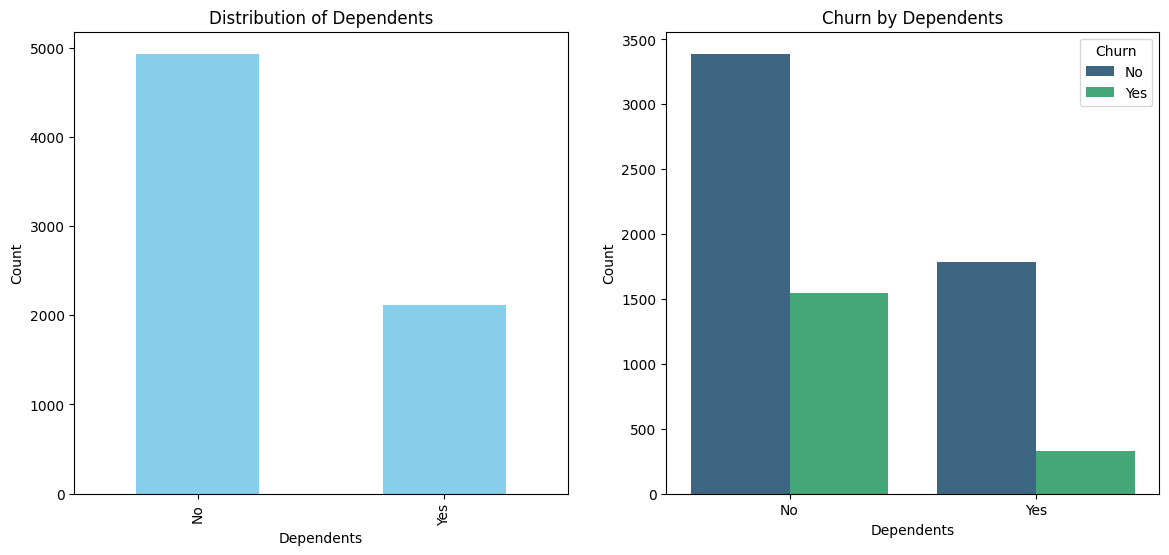

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['Dependents'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Dependents')
axes[0].set_xlabel('Dependents')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by Dependents')
axes[1].set_xlabel('Dependents')
axes[1].set_ylabel('Count')

Observation -

Dependents - binary data value as yes or non-null tells us if customer has dependents or not

can see trends where more customer belongs to category which doesnt have any dependents.

churn by dependents -

rate to cancelling services are more with customer with no dependents and less in customer with dependents


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['Dependents'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Dependents')
axes[0].set_xlabel('Dependents')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by Dependents')
axes[1].set_xlabel('Dependents')
axes[1].set_ylabel('Count')

Text(0, 0.5, 'Count')

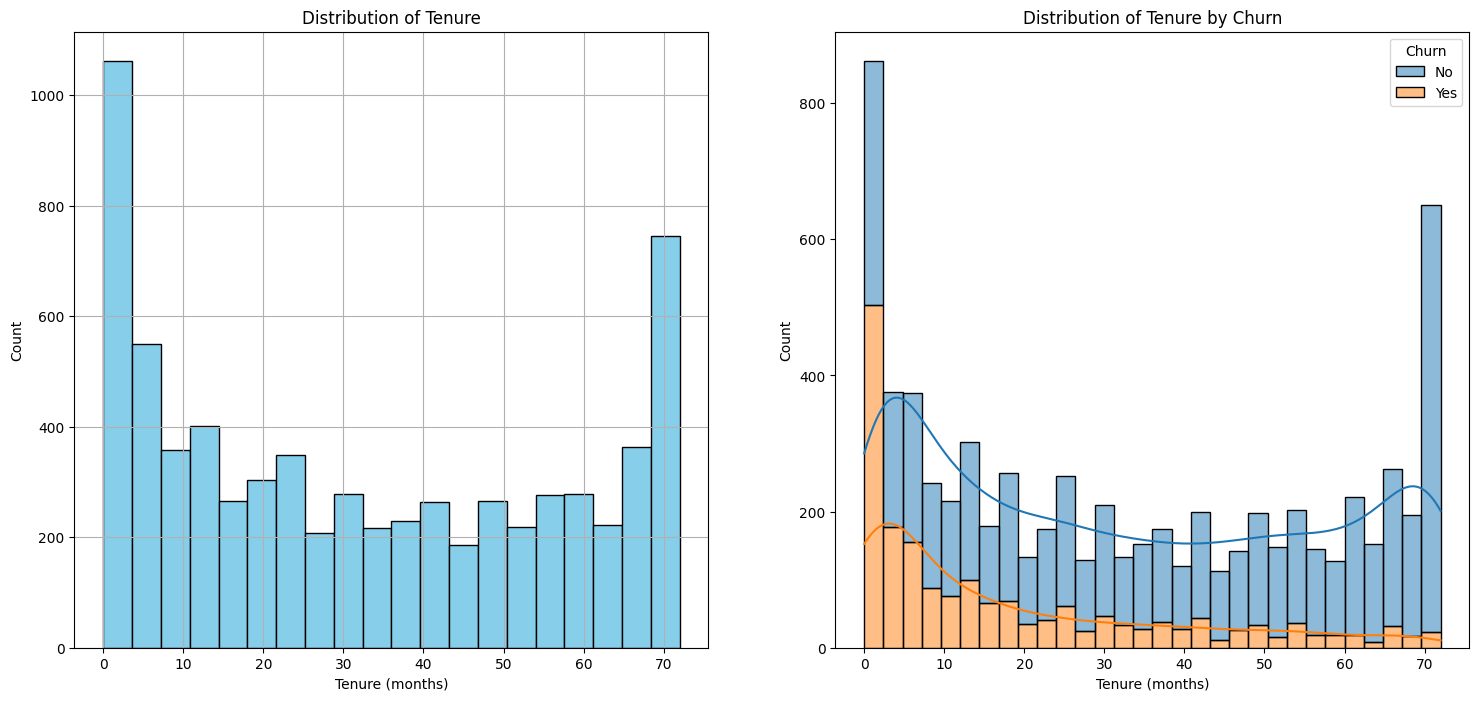

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# First plot: Histogram for tenure distribution
df['tenure'].hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Tenure')
axes[0].set_xlabel('Tenure (months)')
axes[0].set_ylabel('Count')

# Second plot: Histogram for tenure distribution by Churn with KDE
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple='stack', bins=30, ax=axes[1])
axes[1].set_title('Distribution of Tenure by Churn')
axes[1].set_xlabel('Tenure (months)')
axes[1].set_ylabel('Count')
#axes[1].legend(title='Churn', loc='upper right')

Obeservation -

Most of the customer are prefering lower tenure for subscription.

Clearly there is a trend where customer with lower tenure are more likely to cancel the services


Text(0, 0.5, 'Count')

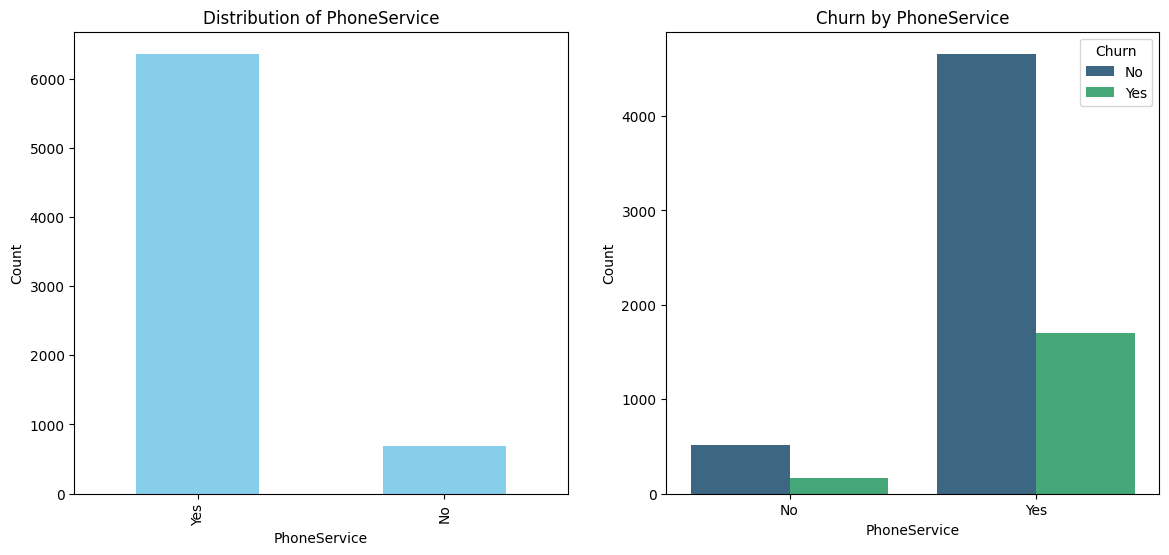

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['PhoneService'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of PhoneService')
axes[0].set_xlabel('PhoneService')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='PhoneService', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by PhoneService')
axes[1].set_xlabel('PhoneService')
axes[1].set_ylabel('Count')

Observation -

I dont see major trends to be indentified here because most of the customer have subscription of phoneService and not much of trend i can analyse with churn .

Text(0, 0.5, 'Count')

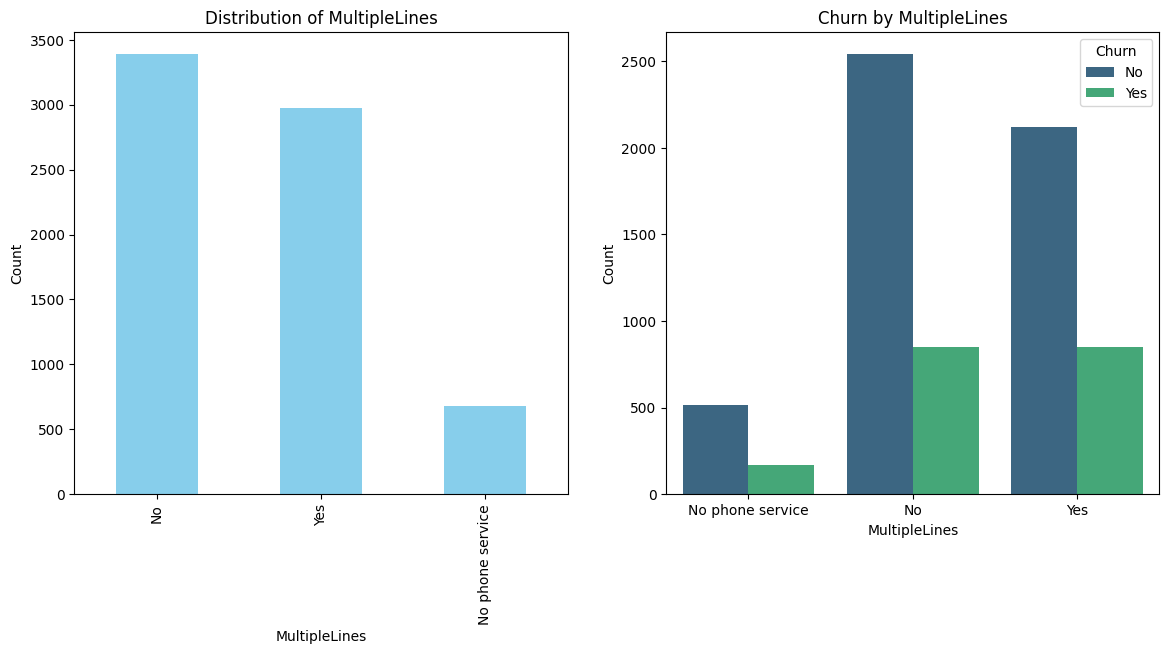

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['MultipleLines'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of MultipleLines')
axes[0].set_xlabel('MultipleLines')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='MultipleLines', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by MultipleLines')
axes[1].set_xlabel('MultipleLines')
axes[1].set_ylabel('Count')

Observation -

Unable to see any trends here

Text(0, 0.5, 'Count')

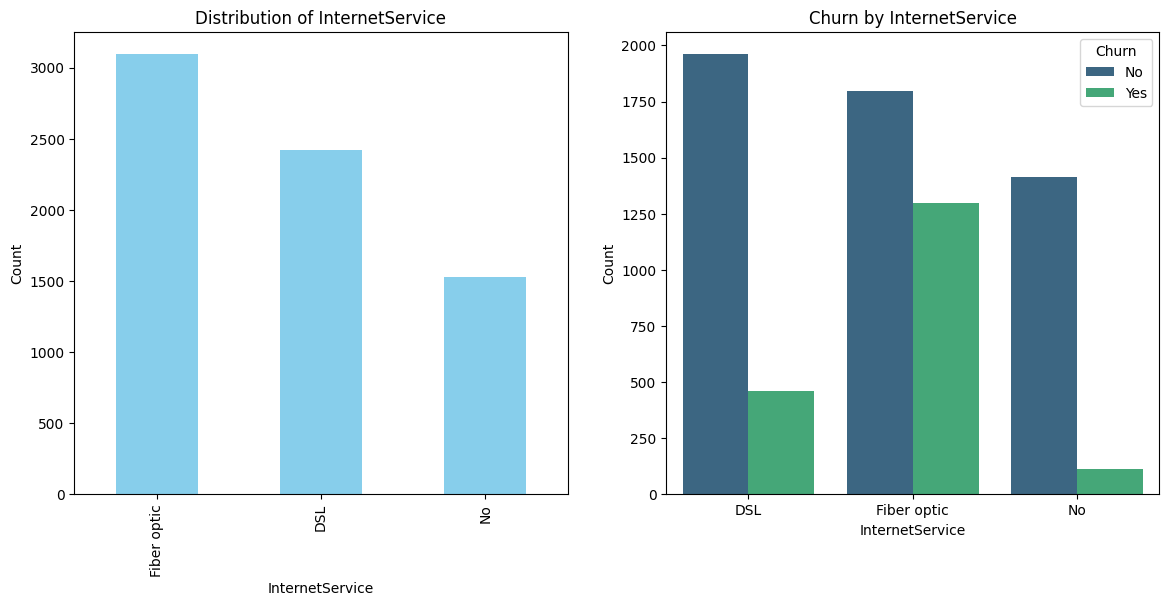

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['InternetService'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of InternetService')
axes[0].set_xlabel('InternetService')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='InternetService', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by InternetService')
axes[1].set_xlabel('InternetService')
axes[1].set_ylabel('Count')

Observcation -

Most of the customer are prefering either fiber optics for internet service but customer with DSL service are less likely to cancel the subscription.


Text(0, 0.5, 'Count')

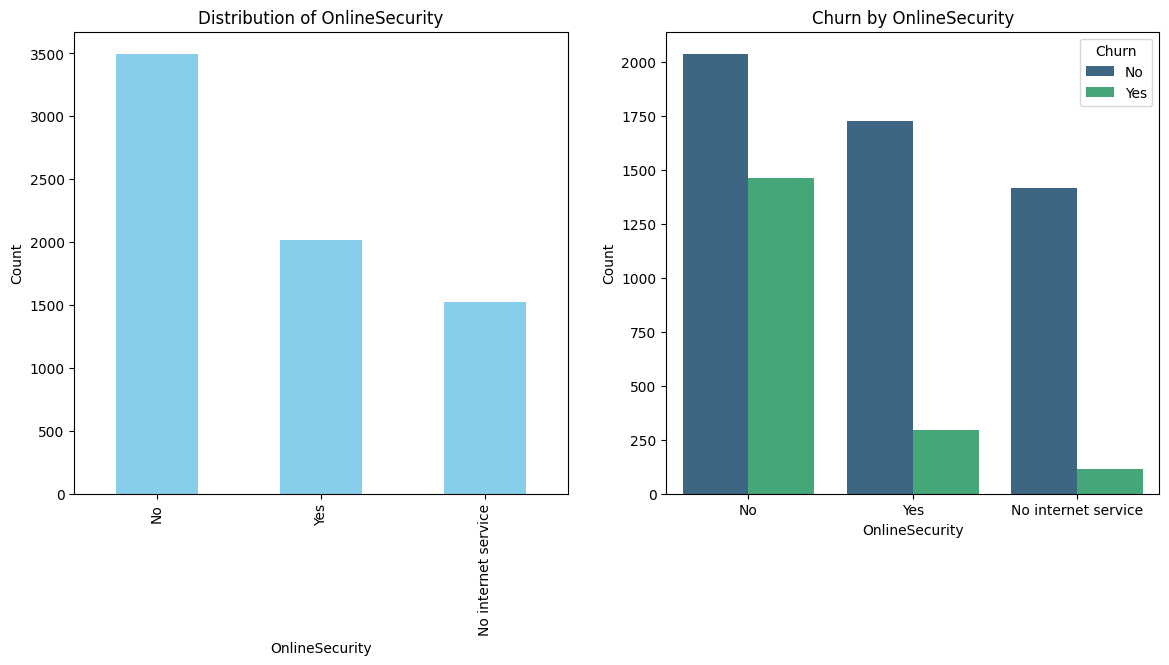

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['OnlineSecurity'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of OnlineSecurity')
axes[0].set_xlabel('OnlineSecurity')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by OnlineSecurity')
axes[1].set_xlabel('OnlineSecurity')
axes[1].set_ylabel('Count')

observation -


almost 50% customer doesnt opt for onlne security and more likely to churn .

almost 28.5 % customer opted for online security and less likely to churn.
almor 21.5 % customer not having any services

Text(0, 0.5, 'Count')

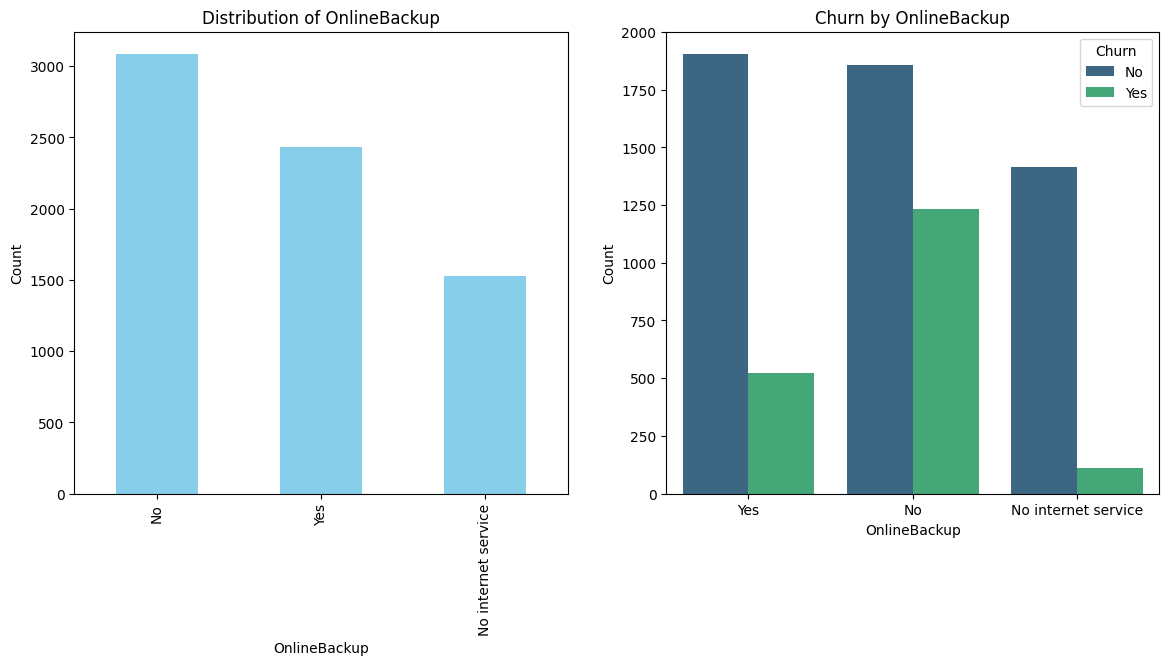

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['OnlineBackup'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of OnlineBackup')
axes[0].set_xlabel('OnlineBackup')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='OnlineBackup', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by OnlineBackup')
axes[1].set_xlabel('OnlineBackup')
axes[1].set_ylabel('Count')

Text(0, 0.5, 'Count')

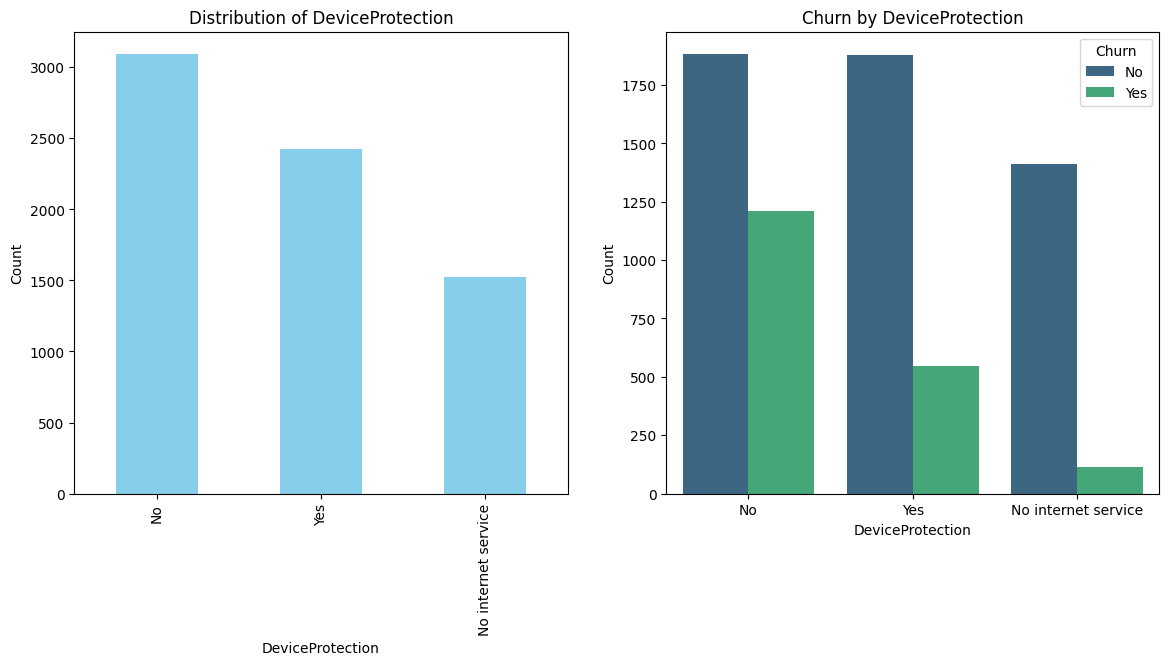

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['DeviceProtection'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of DeviceProtection')
axes[0].set_xlabel('DeviceProtection')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='DeviceProtection', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by DeviceProtection')
axes[1].set_xlabel('DeviceProtection')
axes[1].set_ylabel('Count')

Text(0, 0.5, 'Count')

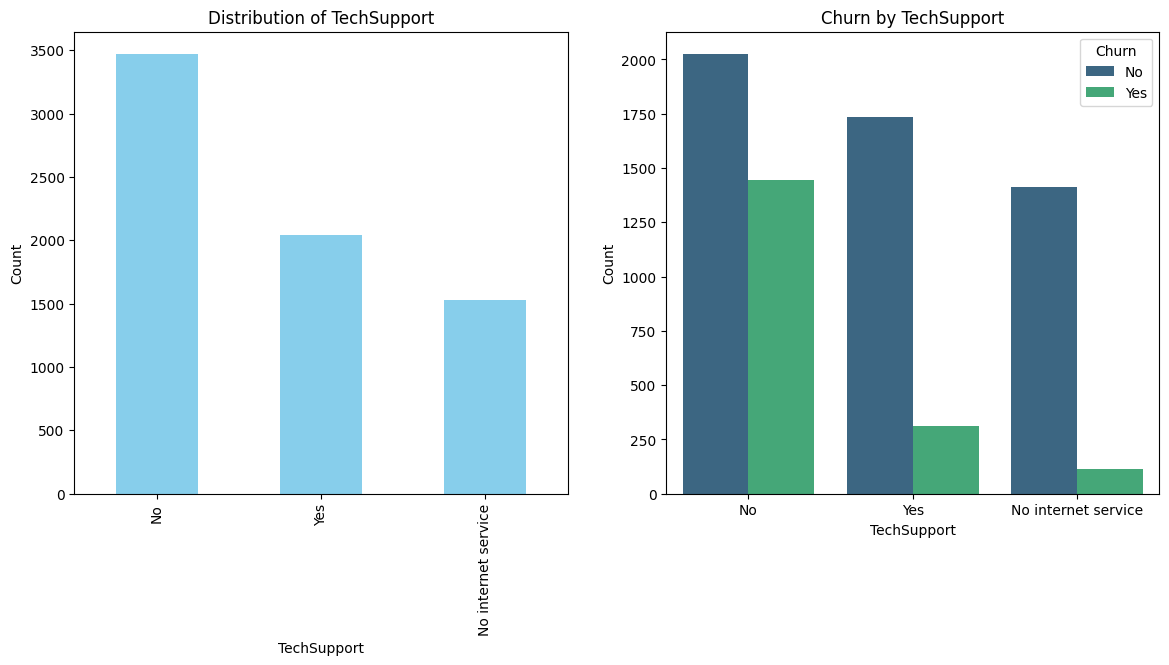

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['TechSupport'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of TechSupport')
axes[0].set_xlabel('TechSupport')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='TechSupport', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by TechSupport')
axes[1].set_xlabel('TechSupport')
axes[1].set_ylabel('Count')

Text(0, 0.5, 'Count')

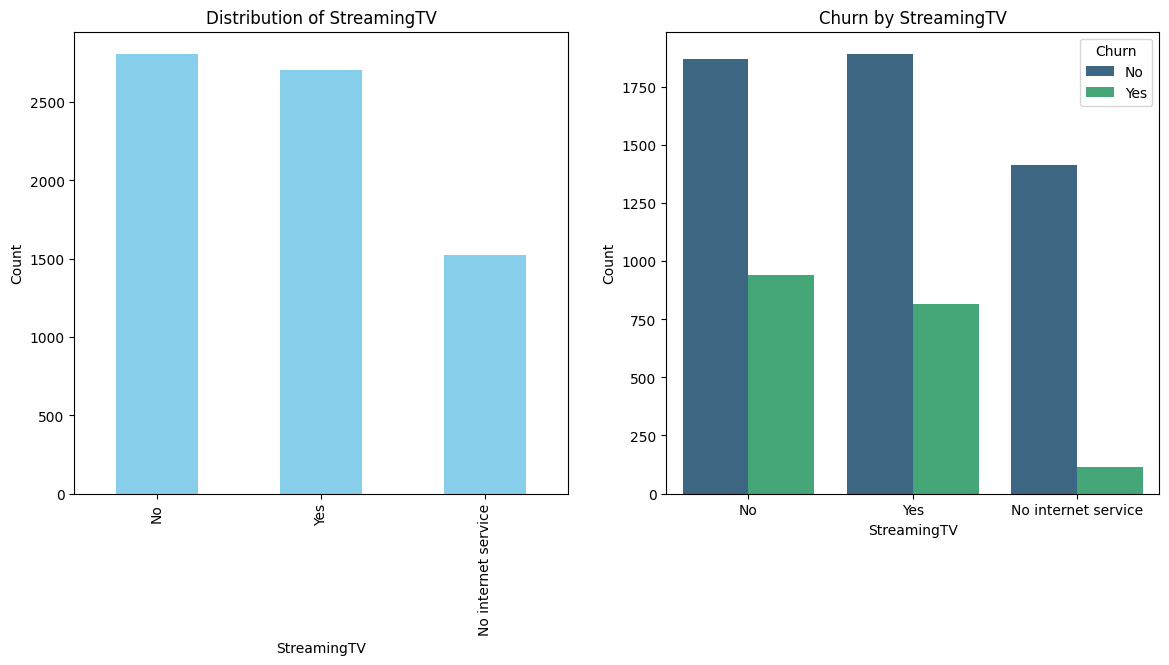

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['StreamingTV'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of StreamingTV')
axes[0].set_xlabel('StreamingTV')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='StreamingTV', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by StreamingTV')
axes[1].set_xlabel('StreamingTV')
axes[1].set_ylabel('Count')

Text(0, 0.5, 'Count')

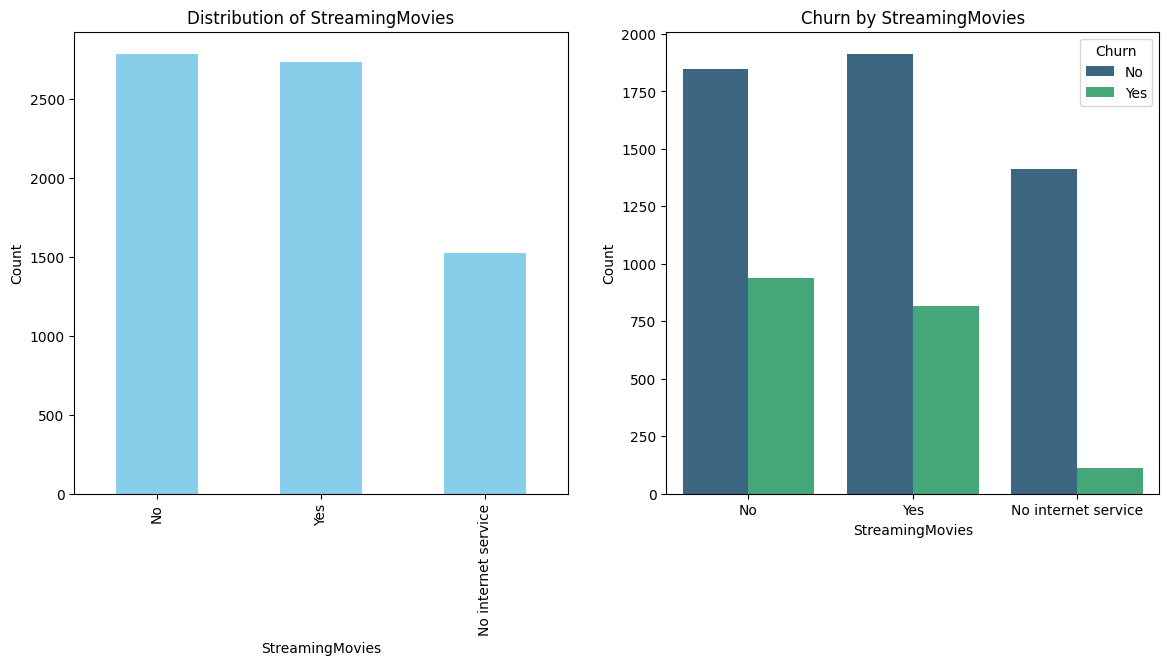

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['StreamingMovies'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of StreamingMovies')
axes[0].set_xlabel('StreamingMovies')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='StreamingMovies', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by StreamingMovies')
axes[1].set_xlabel('StreamingMovies')
axes[1].set_ylabel('Count')

Text(0, 0.5, 'Count')

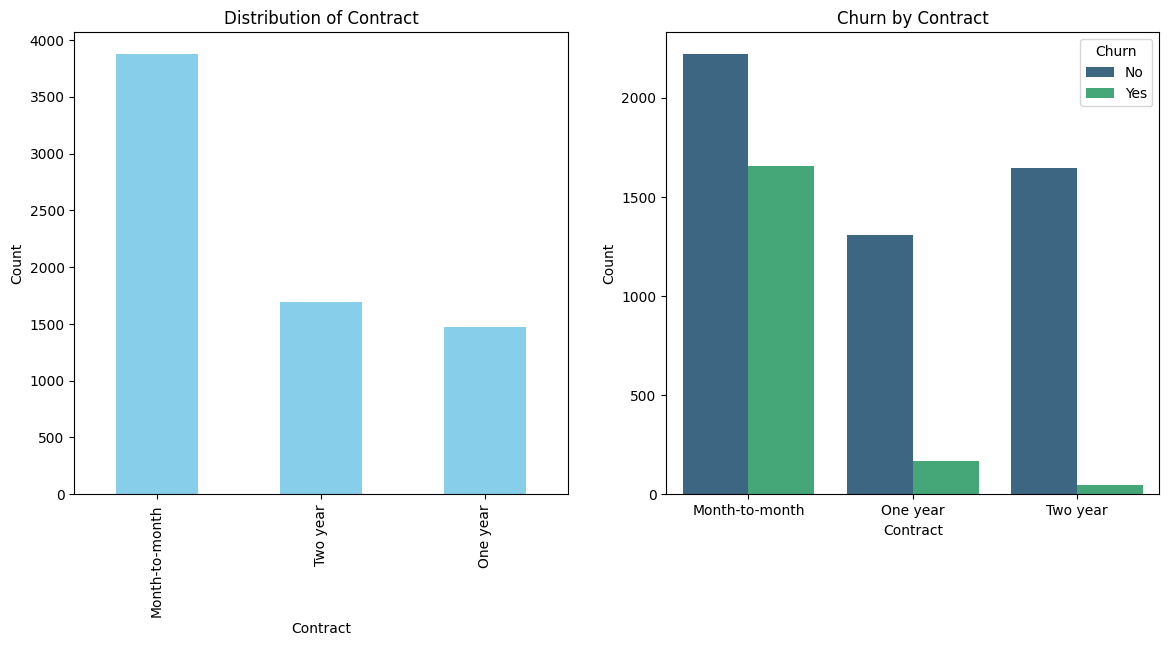

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['Contract'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Contract')
axes[0].set_xlabel('Contract')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by Contract')
axes[1].set_xlabel('Contract')
axes[1].set_ylabel('Count')

Text(0, 0.5, 'Count')

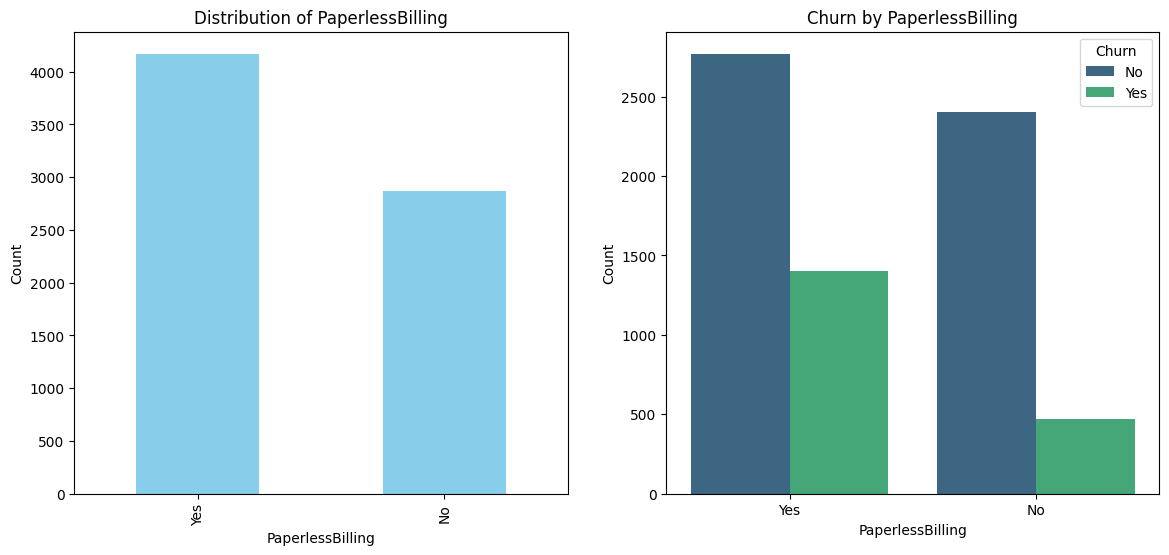

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['PaperlessBilling'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of PaperlessBilling')
axes[0].set_xlabel('PaperlessBilling')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by PaperlessBilling')
axes[1].set_xlabel('PaperlessBilling')
axes[1].set_ylabel('Count')

Text(0, 0.5, 'Count')

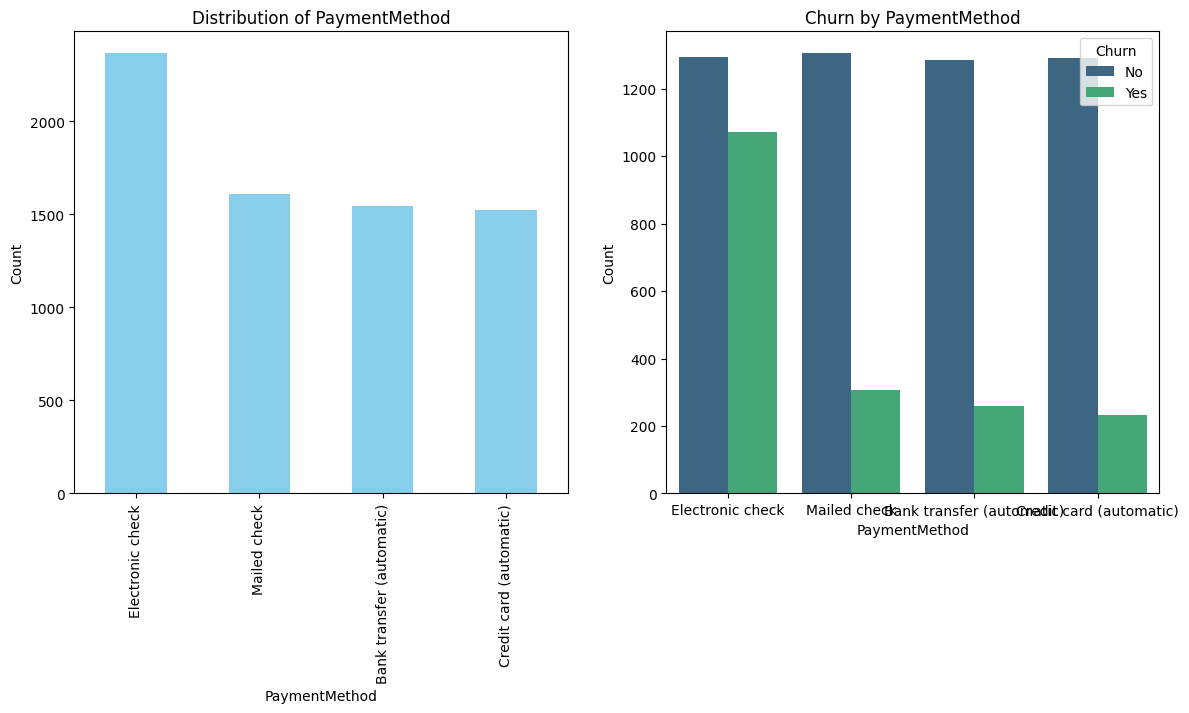

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['PaymentMethod'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of PaymentMethod')
axes[0].set_xlabel('PaymentMethod')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='PaymentMethod', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by PaymentMethod')
axes[1].set_xlabel('PaymentMethod')
axes[1].set_ylabel('Count')